In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import random

In [22]:
sd = 0.5 # Standard Deviation
m,b = -0.25, 5 # slope & y intercept
X = np.linspace(0,20,100) # 100 values between 0 and 20
Y = np.exp(np.random.normal(loc=m*X+b, scale=sd)) # Exponential Function

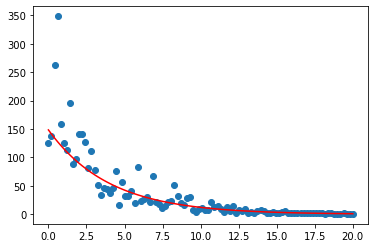

In [23]:
plt.scatter(X,Y) # Scatter plot with the above figures
Y_hat = np.exp(m*X+b) # Exponential function of the line above
plt.plot(X,Y_hat, color='r') # Plot it

In [24]:
with pm.Model() as model:
  m = pm.Normal('m',mu=0, sd=2)
  b = pm.Normal('b',mu=0, sd=2)
  s = pm.Exponential('s',lam=1)
  y_hat = pm.math.dot(m, X) + b
  lik = pm.Normal('lik', mu=y_hat, observed=pm.math.log(Y), sigma=s)
  trace = pm.sample(chains=4)

C:\Users\wallj\AppData\Local\Temp/ipykernel_11836/1472281671.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(chains=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\wallj\anaconda3\envs\datascienv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\wallj\anaconda3\envs\datascienv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\wallj\anaconda3\envs\datascienv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 182 seconds.
The acceptance probability does not match the target. It is 0.8946059616708453, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8844317034561998, but should be close to 0.8. Try to increase the number of tuning steps.


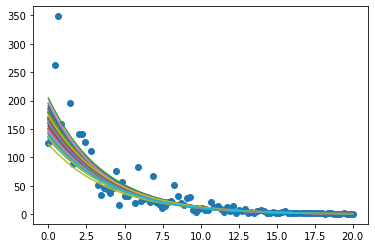

In [25]:
def post_plot(trace_obj=trace,samples=100,size=len(X)):
  for itr in range(samples):
    idx = random.choice(range(size))
    m = trace_obj.get_values('m')[idx]
    b = trace_obj.get_values('b')[idx]
    Y_hat = np.exp(m*X + b)
    plt.plot(X,Y_hat)
  plt.scatter(X,Y)

post_plot()  

<AxesSubplot:>

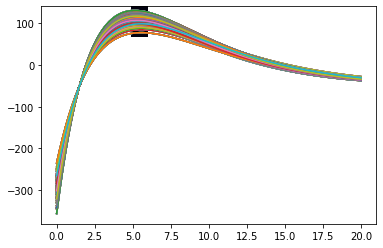

In [26]:
def rev_posterior(samples=100, size=len(X)):
  for s in range(samples):
    idx = random.choice(range(size))
    m = trace.get_values('m')[idx]
    b = trace.get_values('b')[idx]
    rev = X * np.exp(m*X +b)
    plt.plot(X, rev)
  return 

# rev_posterior()  

@np.vectorize
def cost(X):
  return 1.5*X + 50

def prof_posterior(samples=100, size=len(X)):
  prices = []
  profits = []
  for s in range(samples):
    idx = random.choice(range(size))
    m = trace.get_values('m')[idx]
    b = trace.get_values('b')[idx]
    demand = np.exp(m*X +b)
    rev = X * demand
    prof = rev - cost(demand)
    plt.plot(X, prof)
    
    best_price = X[np.argmax(prof)]
    best_prof = np.max(prof)
    prices.append(best_price)
    profits.append(best_prof)
  return prices,profits   

prices, profits = prof_posterior(samples=1000)

import seaborn as sns
sns.kdeplot(x=prices, y=profits, cmap='inferno', fill=True, thresh=0)